# In-Class Assignment 21 - Evan Callaghan

In [15]:
## 1. a) Using the pandas library to read the csv data file and create a data-frame called circles

import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

circles = pd.read_csv(file_content_stream)

circles.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


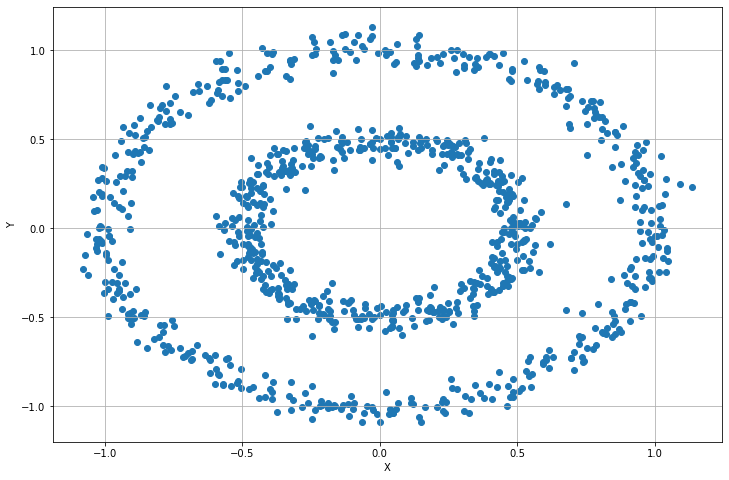

In [16]:
## b) Using the proper Python commands to visualize the data

## Visualizing the data
plt.figure(figsize = (12, 8))

plt.scatter('x', 'y', data = circles)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

## The data is displayed in two circles with the same centres and different radiuses.

In [17]:
## c) Using the appropriate standardization formula to put all the variables on the same scale

scaler = MinMaxScaler(feature_range = (0,1))
circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles[['x', 'y']])

In [18]:
## d) Using the SpectralClustering function to cluster the data into two clusters using 20 neighbors

## Building the model
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors',
                                         n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])

## Extracting cluster labels
circles['Cluster'] = spectral_clustering.labels_

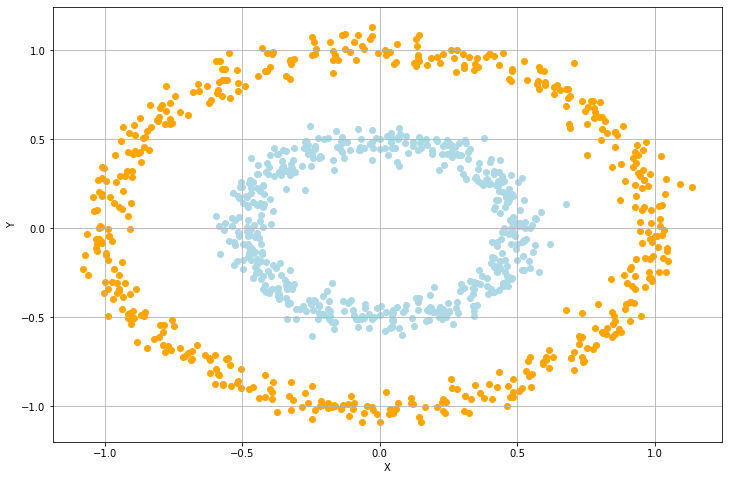

In [19]:
## e) Visualizing the data with cluster membership

## Visualizing the data
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

for i in circles['Cluster'].unique():
    
    ## Selecting data related to cluster i
    temp = circles[circles['Cluster'] == i]
    
    ## Plotting the points
    plt.scatter(temp['x'], temp['y'], color = colors[i])
    

## Now, we can see the two circles were placed in distinct cluster groups.